# Une utilisation optimale de GitHub ?
##### ROY - TOMATIS - MATHS DATASCIENCE S5

### GitHub, un pilier du monde du développement

1. 94 millions de développeurs dont 20,5 millions de nouvelles recrues en 2022
2. 1 milliard de $ de revenus en 2022
3. 3,5 milliards de contributions. 85,7 millions de nouveaux repos créés via GitHub en 2023
4. 90 % des contributeurs de projets open source proviennent de GitHub
5. Ancrée dans le monde des affaires, la filiale rencontre peu de difficultés pour s’imposer auprès de grands groupes.

### Que permet un repos GitHub populaire ?

1. **Visibilité accrue :** Les repos populaires attirent l'attention, meilleure visibilité du projet et intérêt communautaire.
2. **Contributions collaboratives :** Encouragent les contributions externes (pull requests), donc qualité du code et favorise une collaboration ouverte.
3. **Feedback et améliorations :** Les issues permettent d'identifier les bugs, demander des fonctionnalités et discuter des améliorations, favorisant ainsi le développement continu et la satisfaction des utilisateurs.
4. **Diversité des cas d'utilisation :** Avec les forks, les développeurs peuvent adapter le projet à divers besoins, fournissant des idées pour des fonctionnalités et améliorations pour rendre le projet plus polyvalent et adaptable.
5. **Réputation et validation :** Renforce la réputation du développeur en validant la qualité de son travail, peut avoir un impact positif sur sa carrière professionnelle et ses projets futurs.

Pour améliorer les statistiques d'un dépôt Github, il est crucial de comprendre différents aspects tels que l'engagement de la communauté, la qualité du code, la fréquence des mises à jour, etc.
Nous allons donc voir plusieurs aspects avec des graphiques et des analyses pour comprendre les statistiques d'un dépôt Github.

Pour ce faire nous allons utiliser deux csv :
- `repositories.csv` : contient des informations sur les dépôts.
- `X.csv` : contient des informations sur les commits, les problèmes, les étoiles, les fourches, etc.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
from ast import literal_eval

repositories = pd.read_csv('repositories.csv', parse_dates=['Created At', 'Updated At'])
repositories['Topics'] = repositories['Topics'].apply(literal_eval).apply(tuple)
repositories['Created At Year'] = repositories['Created At'].dt.year
repositories['Updated At Year'] = repositories['Updated At'].dt.year

# 1. Tendance des mises à jour au fil du temps.

#### Graphique de la fréquence des mises à jour par rapport au temps (Updated At vs. Created At).

<Axes: xlabel='Updated At Year'>

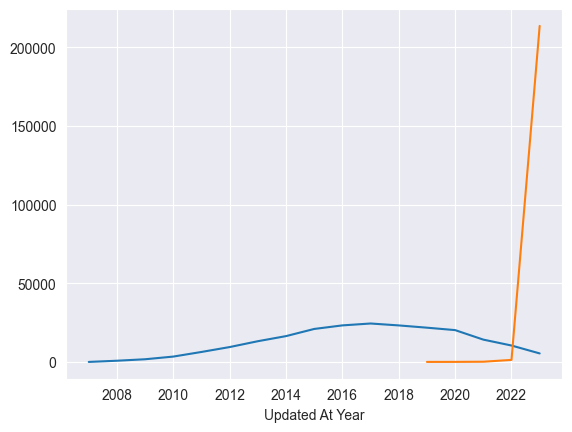

In [52]:
# Plot qui compare 'Updated At' et 'Created At' avec le nombre de repositories
repositories.groupby('Created At Year').size().plot(kind='line')
repositories.groupby('Updated At Year').size().plot(kind='line')

#### Graphique de la croissance de la taille du code au fil du temps.

<Axes: xlabel='Created At Year'>

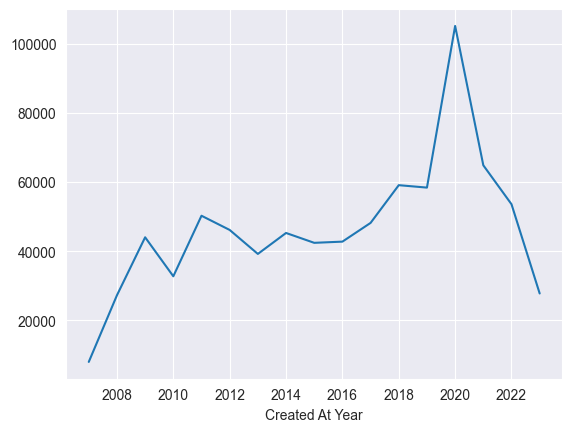

In [53]:
# Plot qui compare 'Size' et 'Created At' avec le nombre de repositories en moyenne
repositories.groupby('Created At Year')['Size'].mean().plot(kind='line')

# 2. Engagement de la communauté

#### Graphique du nombre d'étoiles (Stars) et de fourches (Forks) par rapport au temps.

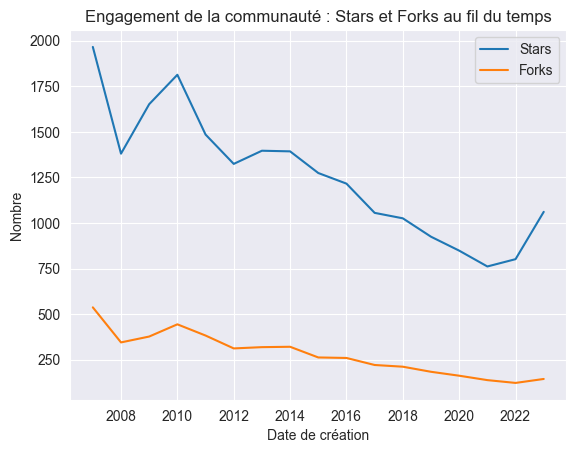

In [54]:
# Plot qui compare 'Stars' et 'Forks' avec le nombre de repositories
repositories.groupby('Created At Year')['Stars'].mean().plot(kind='line')
repositories.groupby('Created At Year')['Forks'].mean().plot(kind='line')
plt.title('Engagement de la communauté : Stars et Forks au fil du temps')
plt.xlabel('Date de création')
plt.ylabel('Nombre')
plt.legend()

#### Graphique du nombre de problèmes (Issues) ouverts et fermés au fil du temps.

# 3. Analyse du code

#### Analyse de la distribution des langages de programmation utilisés.

Text(0.5, 0, 'Nombre de dépôts')

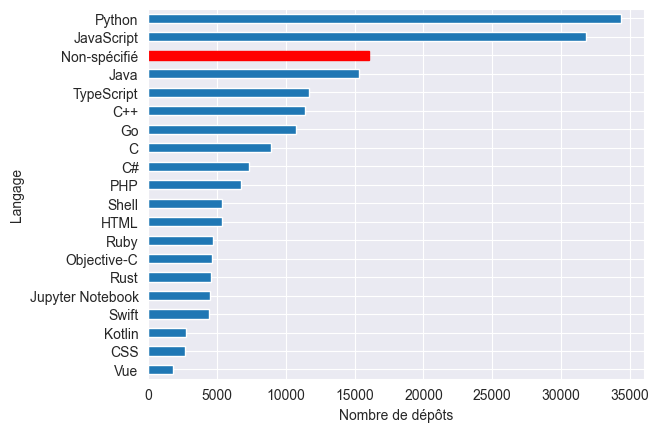

In [55]:
# Plot qui compare 'Language' avec le nombre de repositories, prend les 20 premiers langages
none_value = 'Non-spécifié'
repositories['Language'] = repositories['Language'].fillna(none_value)
repositories_languages = repositories.groupby('Language').size().sort_values(ascending=True).tail(20)
repositories_languages.plot(kind='barh')
# Highlight the None value
index = repositories_languages.index.get_loc(none_value)
plt.gca().get_children()[index].set_color('r')
plt.ylabel('Langage')
plt.xlabel('Nombre de dépôts')

Graphique de l'évolution de l'utilisation des langages de programmation au fil du temps.

<Axes: xlabel='Created At Year'>

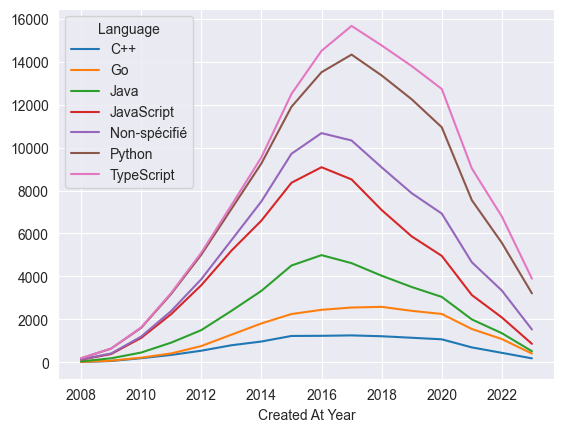

In [56]:
# Plot qui montre l'évolution de l'utilisation des langages de programmation au fil du temps
repositories.groupby('Language').filter(lambda x: len(x) > 10_000).groupby(['Created At Year', 'Language']).size().unstack().plot(
	kind='line',
	stacked=True
)

#### Graphique de la taille moyenne des fichiers par langage de programmation.

Text(0.5, 0, 'Taille moyenne')

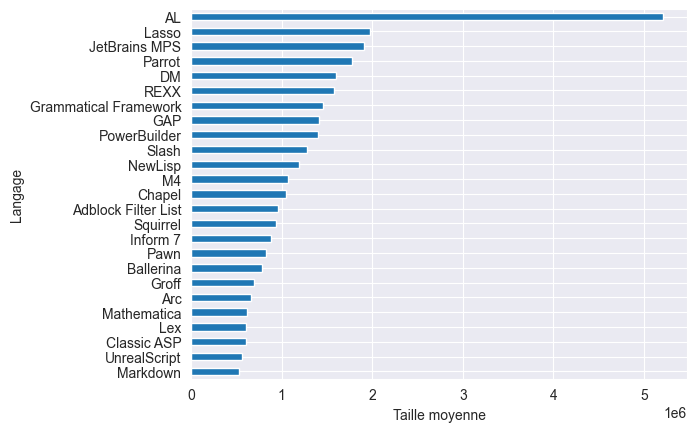

In [57]:
# Plot qui compare 'Language' et 'Size' avec le nombre de repositories
repositories.groupby('Language')['Size'].mean().sort_values(ascending=True).tail(25).plot(kind='barh')
plt.ylabel('Langage')
plt.xlabel('Taille moyenne')

#### Graphique de l'utilisation des topics dans le temps

<Axes: xlabel='Created At'>

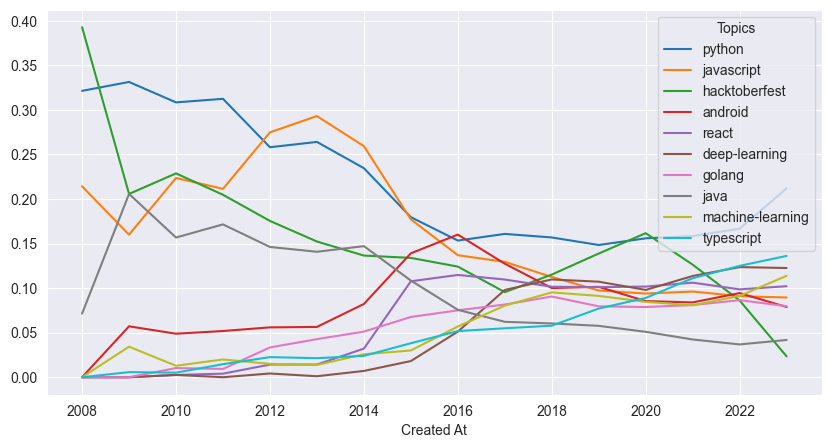

In [58]:
# Plot qui compare 'Topics' avec le nombre de repositories groupé par année
# only keep the top 10 topics
# Expand list-like column 'Topics' into multiple rows
expanded_data = repositories.explode('Topics')

top_topics = expanded_data.groupby([expanded_data['Created At'].dt.year, 'Topics']).size().unstack().fillna(0)
# limit to top 10 topics
top_topics = top_topics[top_topics.sum().sort_values(ascending=False).head(10).index]
# normalize
top_topics = top_topics.div(top_topics.sum(axis=1), axis=0)
top_topics.plot(kind='line', figsize=(10, 5))

#### Graphique de l'utilisation des topics par langage de programmation

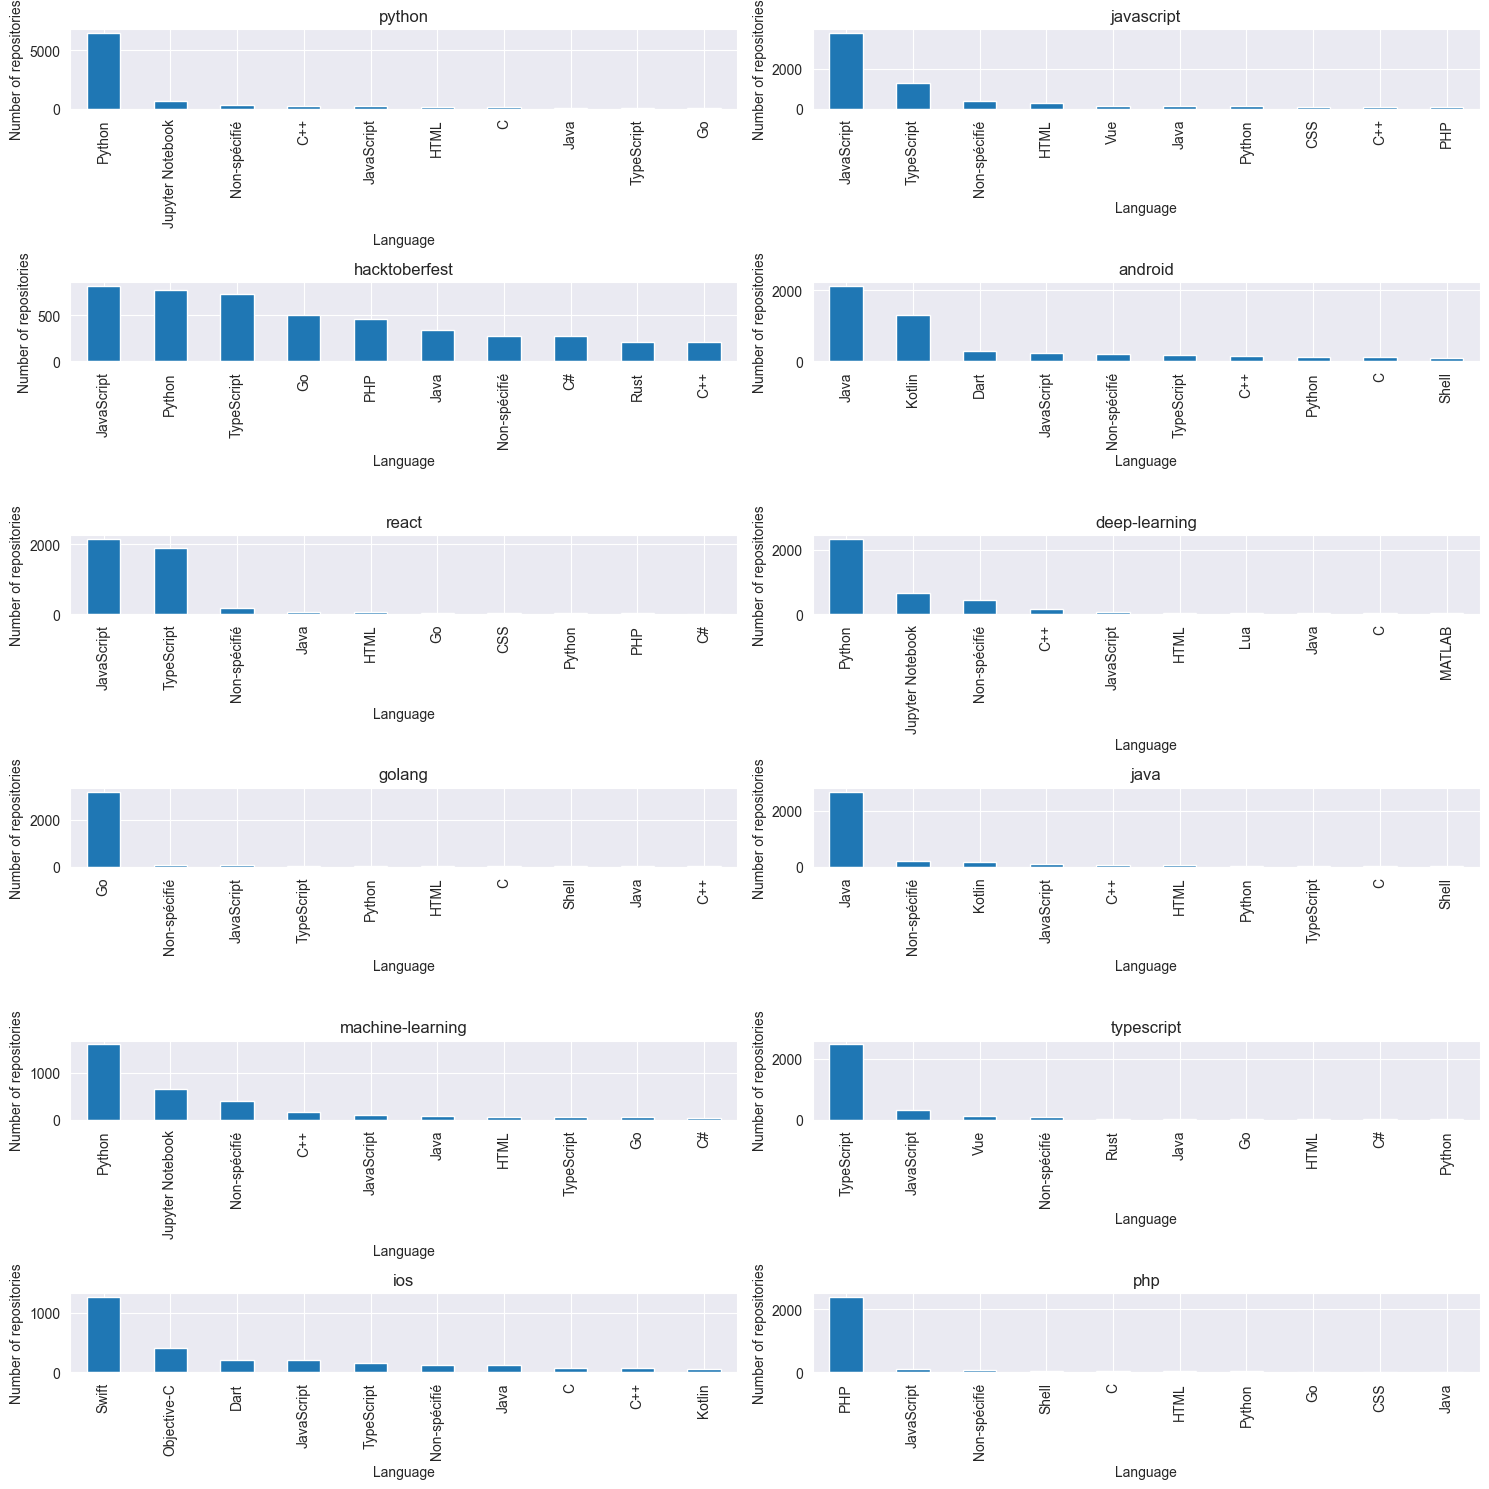

In [62]:
# Plot that compares 'Topics' and 'Language' with the number of repositories, only uses the top 10 topics and 8 most used languages for each topic
expanded_repositories = repositories.explode('Topics')

top_topics = expanded_repositories['Topics'].value_counts().head(12).index
filtered_repositories = expanded_repositories[expanded_repositories['Topics'].isin(top_topics)]
filtered_repositories.loc[:, 'Language'] = filtered_repositories['Language'].fillna(none_value)

fig, axes = plt.subplots(top_topics.size // 2, 2, figsize=(15, 15))
for i, topic in enumerate(top_topics):
	row = i // 2
	col = i % 2
	ax = axes[row, col]
	topic_repositories = filtered_repositories[filtered_repositories['Topics'] == topic]
	topic_repositories['Language'].value_counts().head(10).plot(kind='bar', ax=ax)
	ax.set_title(topic)
	ax.set_xlabel('Language')
	ax.set_ylabel('Number of repositories')
plt.tight_layout()

In [ ]:
# Plot qui compare 'Language' avec le nombre de repositories, récupère top 8 des langages les plus présents dans les topics et liste les langages
filtered_repositories = repositories[repositories['Topics'].isin(top_topics)]
filtered_repositories['Language'] = filtered_repositories['Language'].fillna(none_value)
top_used_languages = filtered_repositories['Language'].value_counts().head(12).index
filtered_repositories = filtered_repositories[filtered_repositories['Language'].isin(top_used_languages)]

# 1 Horizontal stacked bar plot
top_languages_grouped_with_topics: pd.DataFrame = filtered_repositories.groupby(['Language', 'Topics']).size().unstack()
top_languages_grouped_with_topics['sum'] = top_languages_grouped_with_topics.sum(axis=1)
#Sorted by the sum number of repositories of each language
top_languages_grouped_with_topics.sort_values(by='sum', ascending=True, inplace=True)
top_languages_grouped_with_topics.drop(columns='sum', inplace=True)
top_languages_grouped_with_topics.plot(kind='barh', stacked=True, figsize=(16, 8))

# 4. Relation entre différentes métriques

#### Corrélation entre le nombre d'étoiles (Stars) et le nombre de problèmes ouverts (Issues).

In [ ]:
# Plot qui compare 'Stars' et 'Issues' avec le nombre de repositories
sns.scatterplot(x=repositories['Stars'], y=repositories['Issues'])
plt.title('Corrélation entre le nombre d\'étoiles et le nombre de problèmes')
plt.xlabel('Nombre de stars')
plt.ylabel('Nombre d\'issues')

#### Corrélation entre la taille du code et le nombre de contributions par semaine.

In [ ]:
#

# 5. Contribution des développeurs

#### Graphique des principaux contributeurs (basé sur les commits) et de leur activité au fil du temps.

#### Répartition des contributions par auteur.

# 6. Utilisation des fonctionnalités de GitHub

#### Graphique montrant l'utilisation des wiki, des projets, des téléchargements, etc.

# 7. Analyse comparative

#### Comparaison des métriques entre différents dépôts pour identifier les meilleures pratiques.

In [ ]:
metrics = ['Stars', 'Forks', 'Issues', 'Watchers', 'Size']

# Sélection de quelques dépôts pour la comparaison
selected_repos = repositories.sample(n=5, random_state=42)

# Création des graphiques comparatifs
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='Name', y=metric, data=selected_repos)
    plt.title(f'Comparaison de {metric}')
    plt.xlabel('Dépôt')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Analyse de la stabilité et de la maintenance

#### Graphique du nombre de problèmes ouverts et fermés par rapport au temps pour évaluer la stabilité du projet.

#### Graphique de la distribution des branches par défaut et de leur activité.

# 9. Analyse de l'engagement de la communauté

#### Graphique montrant le nombre de contributeurs uniques au fil du temps.

# 10. Analyse de la documentation

#### Graphique montrant l'utilisation du wiki et de la documentation par rapport à d'autres activités.